<a href="https://colab.research.google.com/github/sivasamy1/data_analytics/blob/main/Open_crime_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -ltr /content/drive/MyDrive | grep *.csv

ls: /content/drive/MyDrive/DataSheets: No such file or directory
ls: '/content/drive/MyDrive/Build Club docs': No such file or directory


In [ ]:
!ls -ltr /content/drive/MyDrive/data_analytics/MINIPROJECT_7/2019-07/

total 15800
-r-------- 1 root root  202233 Feb 23  2022 2019-07-city-of-london-street.csv
-r-------- 1 root root  907269 Feb 23  2022 2019-07-cumbria-street.csv
-r-------- 1 root root  820660 Feb 23  2022 2019-07-dyfed-powys-street.csv
-r-------- 1 root root  834559 Feb 23  2022 2019-07-btp-street.csv
-r-------- 1 root root 1041027 Feb 23  2022 2019-07-warwickshire-street.csv
-r-------- 1 root root  724019 Feb 24  2022 2019-07-cumbria-outcomes.csv
-r-------- 1 root root  140007 Feb 24  2022 2019-07-city-of-london-outcomes.csv
-r-------- 1 root root  455315 Feb 24  2022 2019-07-lincolnshire-outcomes.csv
-r-------- 1 root root  598219 Feb 24  2022 2019-07-gwent-outcomes.csv
-r-------- 1 root root  697404 Feb 24  2022 2019-07-gloucestershire-outcomes.csv
-r-------- 1 root root  565893 Feb 24  2022 2019-07-dyfed-powys-outcomes.csv
-r-------- 1 root root  410810 Feb 24  2022 2019-07-north-yorkshire-outcomes.csv
-r-------- 1 root root  780830 Feb 24  2022 2019-07-north-wales-outcomes.csv
-r-

## **PART I**

In [ ]:
import os
import pandas as pd
from tabulate import tabulate
df = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_7/2019-07/2019-07-merseyside-stop-and-search.csv')

print(tabulate(df.head(10), headers='keys', tablefmt='github'))

|    | Type                      | Date                      |   Part of a policing operation |   Policing operation |   Latitude |   Longitude | Gender   | Age range   | Self-defined ethnicity                                | Officer-defined ethnicity   | Legislation                                       | Object of search         | Outcome                      |   Outcome linked to object of search | Removal of more than just outer clothing   |
|----|---------------------------|---------------------------|--------------------------------|----------------------|------------|-------------|----------|-------------|-------------------------------------------------------|-----------------------------|---------------------------------------------------|--------------------------|------------------------------|--------------------------------------|--------------------------------------------|
|  0 | Person search             | 2019-06-30T23:51:09+00:00 |                            nan |   

### **1.1 Top 10 Type by number events. Type column is the event (see sample data in the end of this document ).**
### **Expected Output:**
### **type, num_events, rank**


In [ ]:
df_num = df.groupby('Type').size().to_frame('num_events').reset_index()
df_num['rank'] = df_num['num_events'].rank(ascending=False)
df_num = df_num.sort_values(by='rank', ascending=True)
print(tabulate(df_num, headers='keys', tablefmt='github'))

|    | Type                      |   num_events |   rank |
|----|---------------------------|--------------|--------|
|  1 | Person search             |         2763 |      1 |
|  0 | Person and Vehicle search |          474 |      2 |
|  2 | Vehicle search            |           49 |      3 |


### **1.2 Top 10 Ethnics by number events. Use column “Officer-defined ethnicity”**
### **Expected Output:**
### **type, ethnicity, office_num_events, office_ethnic_rank**


In [ ]:
df_eth1 = df.groupby(['Type', 'Officer-defined ethnicity']).size().to_frame('office_num_events').reset_index()
df_eth1['office_ethnic_rank'] = df_eth1['office_num_events'].rank(ascending=False)
print(tabulate(df_eth1, headers='keys', tablefmt='github'))

|    | Type                      | Officer-defined ethnicity   |   office_num_events |   office_ethnic_rank |
|----|---------------------------|-----------------------------|---------------------|----------------------|
|  0 | Person and Vehicle search | Asian                       |                   7 |                    7 |
|  1 | Person and Vehicle search | Black                       |                  23 |                    5 |
|  2 | Person and Vehicle search | Other                       |                   5 |                    8 |
|  3 | Person and Vehicle search | White                       |                 427 |                    2 |
|  4 | Person search             | Asian                       |                  22 |                    6 |
|  5 | Person search             | Black                       |                 113 |                    3 |
|  6 | Person search             | Other                       |                  24 |                    4 |
|  7 | Per

### **1.3 Top 10 Ethnics by number events. Use column “Self-defined ethnicity”**
### **Expected Output:**
### **type, self_num_events, self_ethnic_rank**


In [ ]:
df_eth2 = df.groupby(['Type', 'Self-defined ethnicity']).size().to_frame('self_num_events').reset_index()
df_eth2['self_ethnic_rank'] = df_eth2['self_num_events'].rank(ascending=False)
df_eth2 = df_eth2.sort_values(by='self_ethnic_rank').head(10).reset_index(drop=True)
print(tabulate(df_eth2, headers='keys', tablefmt='github'))

|    | Type                      | Self-defined ethnicity                                                               |   self_num_events |   self_ethnic_rank |
|----|---------------------------|--------------------------------------------------------------------------------------|-------------------|--------------------|
|  0 | Person search             | White - English/Welsh/Scottish/Northern Irish/British                                |              2212 |                  1 |
|  1 | Person and Vehicle search | White - English/Welsh/Scottish/Northern Irish/British                                |               387 |                  2 |
|  2 | Person search             | Other ethnic group - Not stated                                                      |               321 |                  3 |
|  3 | Person search             | White - Any other White background                                                   |                60 |                  4 |
|  4 | Person and Vehi

### **1.4 Merge 2 and 3 above on type.**
### **Expected Output:**
### **type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank**


In [ ]:
df_merge = df_eth1.merge(df_eth2, on=['Type'])
#df_merge = df_merge[['Type', 'office_num_events', 'office_ethnic_rank', 'self_num_events', 'self_ethnic_rank']]
print(tabulate(df_merge, headers='keys', tablefmt='github'))

|    | Type                      | Officer-defined ethnicity   |   office_num_events |   office_ethnic_rank | Self-defined ethnicity                                                               |   self_num_events |   self_ethnic_rank |
|----|---------------------------|-----------------------------|---------------------|----------------------|--------------------------------------------------------------------------------------|-------------------|--------------------|
|  0 | Person and Vehicle search | Asian                       |                   7 |                    7 | White - English/Welsh/Scottish/Northern Irish/British                                |               387 |                  2 |
|  1 | Person and Vehicle search | Asian                       |                   7 |                    7 | Other ethnic group - Not stated                                                      |                42 |                  5 |
|  2 | Person and Vehicle search | Black        

### **1.5 Top 10 Type by Gender = Male.**
### **Expected Output:**
### **type, num_events_men, rank_men**


In [ ]:
df_male = df[df['Gender'] == 'Male']
df_male = df_male.groupby(['Type']).size().to_frame('num_events_men').reset_index()
df_male['rank_men'] = df_male['num_events_men'].rank(ascending=False)
df_male = df_male.sort_values(by='rank_men').reset_index(drop=True)
print(tabulate(df_male, headers='keys', tablefmt='github'))

|    | Type                      |   num_events_men |   rank_men |
|----|---------------------------|------------------|------------|
|  0 | Person search             |             2498 |          1 |
|  1 | Person and Vehicle search |              433 |          2 |


### **1.6 type, num_events_men, rank_men**
### **Top 10 Type by Gender = Female.**
### **Expected Output:**
### **type, num_events_men, rank_women**


In [ ]:
df_female = df[df['Gender'] == 'Female']
df_female = df_female.groupby(['Type']).size().to_frame('num_events_women').reset_index()
df_female['rank_women'] = df_female['num_events_women'].rank(ascending=False)
df_female = df_female.sort_values(by='rank_women').reset_index(drop=True)
print(tabulate(df_female, headers='keys', tablefmt='github'))

|    | Type                      |   num_events_women |   rank_women |
|----|---------------------------|--------------------|--------------|
|  0 | Person search             |                182 |            1 |
|  1 | Person and Vehicle search |                 29 |            2 |


### **1.7 Group bar chart plot (vertical) with output from 5 and 6.**
### **Bar 1 -> Male**
### **Bar 2 -> Female**


|    | Type                      | Gender   |   num_events |   rank |
|----|---------------------------|----------|--------------|--------|
|  0 | Person search             | Male     |         2498 |      1 |
|  1 | Person and Vehicle search | Male     |          433 |      2 |
|  2 | Person search             | Female   |          182 |      3 |
|  3 | Person and Vehicle search | Female   |           29 |      4 |


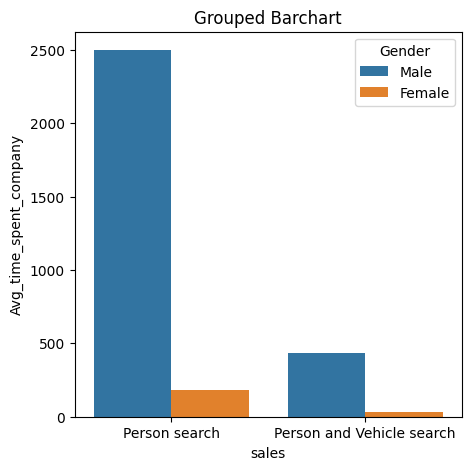

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

combined = df.groupby(['Type', 'Gender']).size().to_frame('num_events').reset_index()
combined['rank'] = combined['num_events'].rank(ascending=False)
combined = combined.sort_values(by='rank').reset_index(drop=True)
print(tabulate(combined, headers='keys', tablefmt='github'))
plt.figure(figsize=(5, 5))
sns.barplot(data=combined, x='Type', y='num_events', hue='Gender')
plt.title('Grouped Barchart')
plt.xlabel('sales')
plt.ylabel('Avg_time_spent_company')

plt.show()

### **1.8 For Gender = Male, number events by “Age range”**
### **Expected Output:**
### **type, age_range_male, num_events_male, rank_male**


In [ ]:
df_male_age = df[df['Gender'] == 'Male']
df_male_age = df_male_age.groupby(['Type', 'Age range']).size().to_frame('num_events_male').reset_index()
df_male_age['rank_male'] = df_male_age['num_events_male'].rank(ascending=False)
df_male_age = df_male_age.sort_values(by='rank_male').head(10).reset_index(drop=True)
df_male_age.columns = ['Type', 'age_range_male', 'num_events_male', 'rank_male']

print(tabulate(df_male_age, headers='keys', tablefmt='github'))

|    | Type                      | age_range_male   |   num_events_male |   rank_male |
|----|---------------------------|------------------|-------------------|-------------|
|  0 | Person search             | 18-24            |               783 |           1 |
|  1 | Person search             | 10-17            |               593 |           2 |
|  2 | Person search             | over 34          |               565 |           3 |
|  3 | Person search             | 25-34            |               552 |           4 |
|  4 | Person and Vehicle search | 25-34            |               170 |           5 |
|  5 | Person and Vehicle search | 18-24            |               163 |           6 |
|  6 | Person and Vehicle search | over 34          |                84 |           7 |
|  7 | Person and Vehicle search | 10-17            |                15 |           8 |


### **1.9 For Gender = Female, number events by “Age range”**
### **Expected Output:**
### **type, age_range_female, num_events_female, rank_female**


In [ ]:
df_female_age = df[df['Gender'] == 'Female']
df_female_age = df_female_age.groupby(['Type', 'Age range']).size().to_frame('num_events_female').reset_index()
df_female_age['rank_female'] = df_female_age['num_events_female'].rank(ascending=False)
df_female_age = df_female_age.sort_values(by='rank_female').head(10).reset_index(drop=True)
df_female_age.columns = ['Type', 'age_range_female', 'num_events_female', 'rank_female']
print(tabulate(df_female_age, headers='keys', tablefmt='github'))

|    | Type                      | age_range_female   |   num_events_female |   rank_female |
|----|---------------------------|--------------------|---------------------|---------------|
|  0 | Person search             | over 34            |                  57 |             1 |
|  1 | Person search             | 25-34              |                  51 |             2 |
|  2 | Person search             | 18-24              |                  48 |             3 |
|  3 | Person search             | 10-17              |                  25 |             4 |
|  4 | Person and Vehicle search | 18-24              |                  11 |             5 |
|  5 | Person and Vehicle search | 25-34              |                  10 |             6 |
|  6 | Person and Vehicle search | over 34            |                   8 |             7 |


### **1.10 Merge 8 and 9 on column “type”**
### **Expected Output:**
### **type, age_range_male, num_events_male, rank_male, age_range_female, num_events_female, rank_female**


In [ ]:
df_combined = df_male_age.merge(df_female_age, on=['Type'])
print(tabulate(df_combined, headers='keys', tablefmt='github'))

|    | Type                      | age_range_male   |   num_events_male |   rank_male | age_range_female   |   num_events_female |   rank_female |
|----|---------------------------|------------------|-------------------|-------------|--------------------|---------------------|---------------|
|  0 | Person search             | 18-24            |               783 |           1 | over 34            |                  57 |             1 |
|  1 | Person search             | 18-24            |               783 |           1 | 25-34              |                  51 |             2 |
|  2 | Person search             | 18-24            |               783 |           1 | 18-24              |                  48 |             3 |
|  3 | Person search             | 18-24            |               783 |           1 | 10-17              |                  25 |             4 |
|  4 | Person search             | 10-17            |               593 |           2 | over 34            |          

## **PART II**

In [ ]:
import os
import pandas as pd
from tabulate import tabulate
df1 = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_7/employee_start_time_end_time.csv')
df2 = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_7/hour_range_slot_for_pay.csv')
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

print(tabulate(df1.head(10), headers='keys', tablefmt='github'))
print(tabulate(df2.head(10), headers='keys', tablefmt='github'))

|    |   employee_id | start_time       | end_time         |
|----|---------------|------------------|------------------|
|  0 |             1 | 1-Mar-2022 09:10 | 1-Mar-2022 05:10 |
|  1 |             2 | 1-Mar-2022 08:10 | 1-Mar-2022 05:10 |
|  2 |             3 | 1-Mar-2022 06:00 | 1-Mar-2022 05:10 |
|  3 |             4 | 1-Mar-2022 06:10 | 1-Mar-2022 05:10 |
|  4 |             5 | 1-Mar-2022 05:10 | 1-Mar-2022 05:10 |
|  5 |             6 | 1-Mar-2022 08:10 | 1-Mar-2022 05:10 |
|  6 |             7 | 1-Mar-2022 07:10 | 1-Mar-2022 05:10 |
|  7 |             1 | 2-Mar-2022 06:10 | 2-Mar-2022 05:10 |
|  8 |             2 | 2-Mar-2022 05:10 | 2-Mar-2022 05:10 |
|  9 |             3 | 2-Mar-2022 08:10 | 2-Mar-2022 05:10 |
|    |   daily_hour_min_range |   daily_hour_max_range |   pay_per_hour_usd |
|----|------------------------|------------------------|--------------------|
|  0 |                      1 |                      5 |                 10 |
|  1 |                      6 |   

### **2.1 The file "Employee_start_time_end_time.csv" contains the start and end times for employees' daily work shifts. The file "hour_range_slot_for_pay.csv" specifies the pay rate applicable based on the number of hours worked for a particular day. For example, if an employee works for 4 hours on a given day, the applicable pay rate is $10 per hour, as 4 hours falls within the range of 1 to 5 hours (see row 1 in the "hour_range_slot_for_pay.csv" file). If an employee works for 7 hours on a given day, the pay rate is 12 dollars per hour, as it falls within the range of 6 to 10 hours (see row 2 in the "hour_range_slot_for_pay.csv" file). Using these criteria, you need to calculate the total pay in USD for each employee based on the provided information from the two CSV files.**
### **Expected output:**
### **empoyee_id,total_pay_usd**


In [ ]:
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])
df1['Hours'] = (df1['start_time'] - df1['end_time']).dt.total_seconds() / 3600
print(tabulate(df1.head(10), headers='keys', tablefmt='github'))


|    |   employee_id | start_time          | end_time            |    Hours |
|----|---------------|---------------------|---------------------|----------|
|  0 |             1 | 2022-03-01 09:10:00 | 2022-03-01 05:10:00 | 4        |
|  1 |             2 | 2022-03-01 08:10:00 | 2022-03-01 05:10:00 | 3        |
|  2 |             3 | 2022-03-01 06:00:00 | 2022-03-01 05:10:00 | 0.833333 |
|  3 |             4 | 2022-03-01 06:10:00 | 2022-03-01 05:10:00 | 1        |
|  4 |             5 | 2022-03-01 05:10:00 | 2022-03-01 05:10:00 | 0        |
|  5 |             6 | 2022-03-01 08:10:00 | 2022-03-01 05:10:00 | 3        |
|  6 |             7 | 2022-03-01 07:10:00 | 2022-03-01 05:10:00 | 2        |
|  7 |             1 | 2022-03-02 06:10:00 | 2022-03-02 05:10:00 | 1        |
|  8 |             2 | 2022-03-02 05:10:00 | 2022-03-02 05:10:00 | 0        |
|  9 |             3 | 2022-03-02 08:10:00 | 2022-03-02 05:10:00 | 3        |


In [ ]:
def pay_rate(Hours):
  for _, row in df2.iterrows():
    if row['daily_hour_min_range'] <= Hours <= row['daily_hour_max_range']:
      return row['pay_per_hour_usd']
  return 0


In [ ]:
df1['pay_rate'] = df1['Hours'].apply(pay_rate)
df1['emp_pay'] = df1['pay_rate'] * df1['Hours']
df1 = df1.groupby('employee_id')['emp_pay'].sum().reset_index()
df1.columns = ['employee_id', 'emp_pay']
print(tabulate(df1, headers='keys', tablefmt='github'))


|    |   employee_id |   emp_pay |
|----|---------------|-----------|
|  0 |             1 |       154 |
|  1 |             2 |       110 |
|  2 |             3 |        60 |
|  3 |             4 |        50 |
|  4 |             5 |        70 |
|  5 |             6 |       130 |
|  6 |             7 |        50 |


### **2.2 Credit Card Fraud Detection: Credit Card Fraud classification using Random Forest Classifier. Column value to be classified is in column "Is_fraud" and all other columns are the features. Use two-fold cross validation and evaluation metrics: Precision, Recall, F1-score, Accuracy. Also print confusion matrix. Refer basic notebook template for some code and also internet.**


In [ ]:
df_credit = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_7/fraud test.csv')
print(tabulate(df_credit.head(10), headers='keys', tablefmt='github'))

|    |   Unnamed: 0 | trans_date_trans_time   |      cc_num | merchant                             | category       |    amt | first    | last     | gender   | street                      | city         | state   |   zip |     lat |      long |   city_pop | job                                   | dob        | trans_num                        |   unix_time |   merch_lat |   merch_long |   is_fraud |
|----|--------------|-------------------------|-------------|--------------------------------------|----------------|--------|----------|----------|----------|-----------------------------|--------------|---------|-------|---------|-----------|------------|---------------------------------------|------------|----------------------------------|-------------|-------------|--------------|------------|
|  0 |            0 | 21/06/2020 12:14        | 2.29116e+15 | fraud_Kirlin and Sons                | personal_care  |   2.86 | Jeff     | Elliott  | M        | 351 Darlene Green           | Columb